In [2]:
# glass identification classification model  building problem
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv')

In [4]:
data.head()

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [5]:
data.shape

(213, 10)

In [ ]:
# data contains 213 rows and 10 columns

In [6]:
data.isna().sum()

1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1.52101  213 non-null    float64
 1   13.64    213 non-null    float64
 2   4.49     213 non-null    float64
 3   1.10     213 non-null    float64
 4   71.78    213 non-null    float64
 5   0.06     213 non-null    float64
 6   8.75     213 non-null    float64
 7   0.00     213 non-null    float64
 8   0.00.1   213 non-null    float64
 9   1        213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
data.describe()

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
data.rename(columns={1.52101:'RI Reractive index',13.64:'Na Sodium',4.49:'Mg Magnisium',1.10:'AL Aluminium',71.78:'Si Silicon',0.06:'K Pottasium',8.75:'Ca Calcium',0.00:'Ba Barium',0.001:'Fe iron',1:'Types of Glass'},inplace=True)


In [10]:
new_column_names=['RI Reractive index','Na Sodium','Mg Magnisium','AL Aluminium','Si Silicon','K Pottasium','Ca Calcium','Ba Barium','Fe iron','Types of Glass']


In [11]:
data.columns=new_column_names

In [12]:
data.head()

,RI Reractive index,Na Sodium,Mg Magnisium,AL Aluminium,Si Silicon,K Pottasium,Ca Calcium,Ba Barium,Fe iron,Types of Glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [13]:
data.shape

(213, 10)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RI Reractive index  213 non-null    float64
 1   Na Sodium           213 non-null    float64
 2   Mg Magnisium        213 non-null    float64
 3   AL Aluminium        213 non-null    float64
 4   Si Silicon          213 non-null    float64
 5   K Pottasium         213 non-null    float64
 6   Ca Calcium          213 non-null    float64
 7   Ba Barium           213 non-null    float64
 8   Fe iron             213 non-null    float64
 9   Types of Glass      213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
# dataset contains only contineous data
# target variable is Glass type with neumerical categorical data
# predict glass type is a classification algorithm problem

In [15]:
data['Types of Glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [16]:
data.columns

Index(['RI Reractive index', 'Na Sodium', 'Mg Magnisium', 'AL Aluminium',
       'Si Silicon', 'K Pottasium', 'Ca Calcium', 'Ba Barium', 'Fe iron',
       'Types of Glass'],
      dtype='object')

In [17]:
data.dtypes

RI Reractive index    float64
Na Sodium             float64
Mg Magnisium          float64
AL Aluminium          float64
Si Silicon            float64
K Pottasium           float64
Ca Calcium            float64
Ba Barium             float64
Fe iron               float64
Types of Glass          int64
dtype: object

In [18]:
# check unique values in Glass type
data['Types of Glass'].nunique()

6

In [19]:
data.isna().sum()

RI Reractive index    0
Na Sodium             0
Mg Magnisium          0
AL Aluminium          0
Si Silicon            0
K Pottasium           0
Ca Calcium            0
Ba Barium             0
Fe iron               0
Types of Glass        0
dtype: int64

In [20]:
# hecking value counts
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

1.52152    3
1.51590    3
1.51645    3
1.51761    2
1.51613    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI Reractive index, Length: 177, dtype: int64


13.21    5
13.02    5
13.00    5
12.85    4
12.86    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na Sodium, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
3.46     1
3.73     1
3.97     1
3.89     1
1.78     1
Name: Mg Magnisium, Length: 93, dtype: int64


1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
       ..
1.61    1
0.88    1
1.05    1
0.65    1
1.94    1
Name: AL Aluminium, Length: 117, dtype: int64


72.99    4
73.10    4
72.86    4
73.28    4
73.11    4
        ..
70.57    1
73.81    1
72.92    1
73.55    1
73.61    1
Name: Si Silicon, Length: 132, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K Pottasium, Leng

In [ ]:
# replace target variable as window glass or non-window glass . if glas type is from 1-4 its window glass(1) if glass type 5 and above is non-window glass(0)

In [21]:
data['Types of Glass'].replace({5:0,6:0,7:0,1:1,2:1,3:1,4:1},inplace=True)

In [22]:
data.head()


,RI Reractive index,Na Sodium,Mg Magnisium,AL Aluminium,Si Silicon,K Pottasium,Ca Calcium,Ba Barium,Fe iron,Types of Glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [23]:
data_unique=pd.DataFrame({'unique_values':data.nunique()})

In [165]:
data_unique

,unique_values
RI Reractive index,177
Na Sodium,142
Mg Magnisium,93
AL Aluminium,117
Si Silicon,132
K Pottasium,65
Ca Calcium,143
Ba Barium,34
Fe iron,32
Types of Glass,2


In [24]:
data.shape

(213, 10)

In [25]:
data.head()

,RI Reractive index,Na Sodium,Mg Magnisium,AL Aluminium,Si Silicon,K Pottasium,Ca Calcium,Ba Barium,Fe iron,Types of Glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [26]:
data.describe()

,RI Reractive index,Na Sodium,Mg Magnisium,AL Aluminium,Si Silicon,K Pottasium,Ca Calcium,Ba Barium,Fe iron,Types of Glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,0.760563
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,0.427745
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,1.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,1.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


In [ ]:
# summary of the statistics of data we can say that there is no null values and negative values
# all column counts are same ,means no missing values
#  mg magnisium ,k pottasium, ba barium,fe iron min value 0,
# Ba barium anf fe iron 0 value present in q1 q2 q3 


In [27]:
data['Mg Magnisium']=data['Mg Magnisium'].replace(0,data['Mg Magnisium'].mean())
data['K Pottasium']=data['K Pottasium'].replace(0,data['K Pottasium'].mean())
data['Ba Barium']=data['Ba Barium'].replace(0,data['Ba Barium'].mean())
data['Fe iron']=data['Fe iron'].replace(0,data['Fe iron'].mean())


In [28]:
data.describe()

,RI Reractive index,Na Sodium,Mg Magnisium,AL Aluminium,Si Silicon,K Pottasium,Ca Calcium,Ba Barium,Fe iron,Types of Glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,3.203729,1.446526,72.655023,0.569405,8.957934,0.320361,0.095731,0.760563
std,0.003039,0.818371,0.613523,0.499882,0.774052,0.621481,1.426435,0.449154,0.076323,0.427745
min,1.511150,10.730000,0.330000,0.290000,69.810000,0.020000,5.430000,0.060000,0.010000,0.000000
25%,1.516520,12.900000,2.676056,1.190000,72.280000,0.480000,8.240000,0.175869,0.057277,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.175869,0.057277,1.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.175869,0.100000,1.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


In [ ]:
# no null value ,negative value
# no missing value


In [29]:
data1_unique=pd.DataFrame({'unique_values':data.nunique()})

In [30]:
data1_unique


,unique_values
RI Reractive index,177
Na Sodium,142
Mg Magnisium,93
AL Aluminium,117
Si Silicon,132
K Pottasium,65
Ca Calcium,143
Ba Barium,34
Fe iron,32
Types of Glass,2


In [31]:
data.head()

,RI Reractive index,Na Sodium,Mg Magnisium,AL Aluminium,Si Silicon,K Pottasium,Ca Calcium,Ba Barium,Fe iron,Types of Glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.175869,0.057277,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.175869,0.057277,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.175869,0.057277,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.175869,0.057277,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.175869,0.260000,1


In [32]:
data['Types of Glass'].unique()

array([1, 0], dtype=int64)

In [33]:
data['Types of Glass'].value_counts()

1    162
0     51
Name: Types of Glass, dtype: int64

In [ ]:
# we can see that target variable is categorical variable because unique values are only two
# so we can build classification model 

1    162
0     51
Name: Types of Glass, dtype: int64

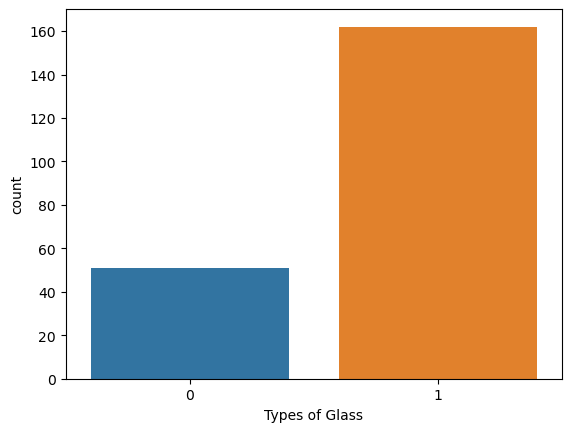

In [34]:
# data visualisation of target variable using countplot
sns.countplot(x='Types of Glass',data=data)
data['Types of Glass'].value_counts()


In [ ]:
# window glass value counts are high compared to non window glass,assume that imbalance is present 

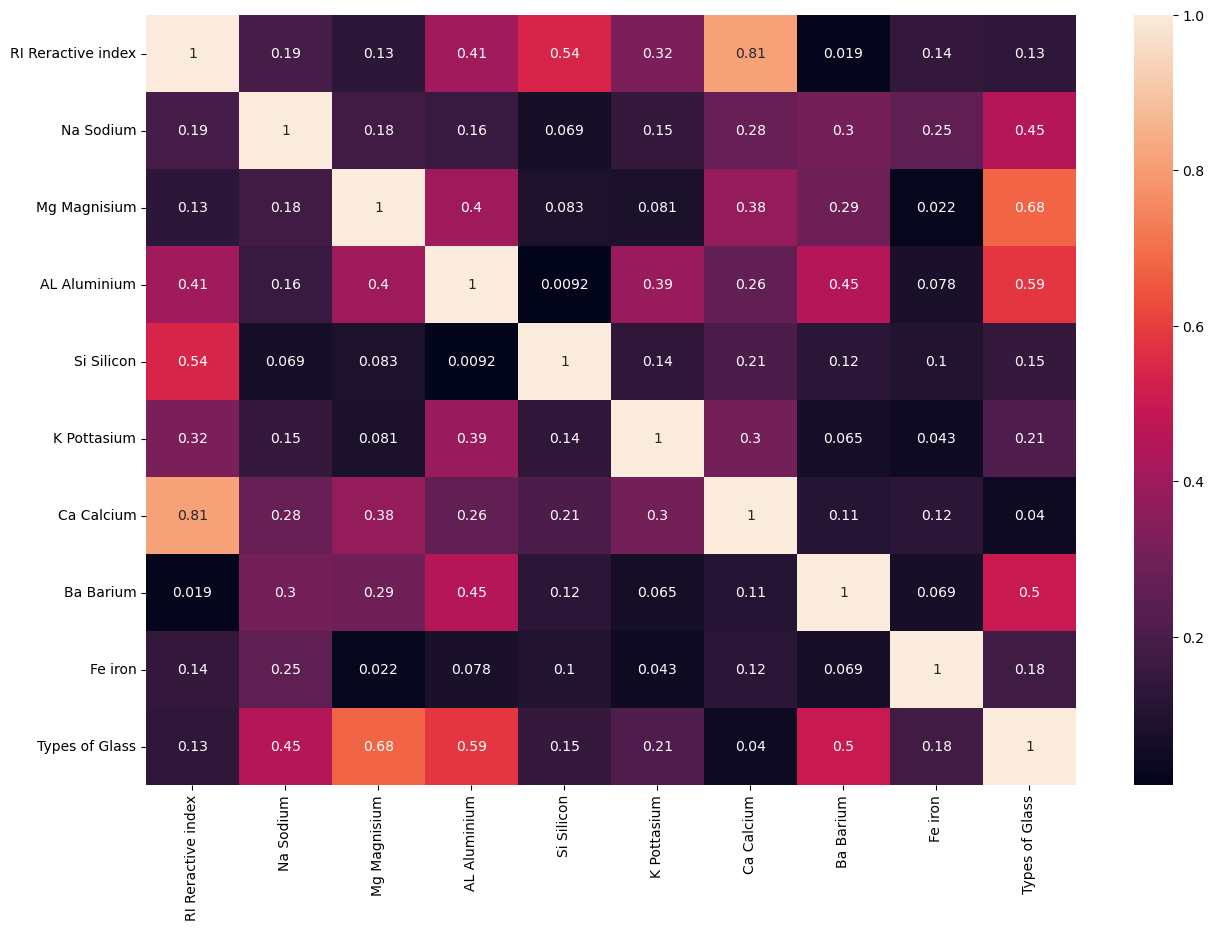

In [35]:
# check corelation of features and target and featues all with each other
corr=data.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,annot_kws={'size':10})
plt.show()

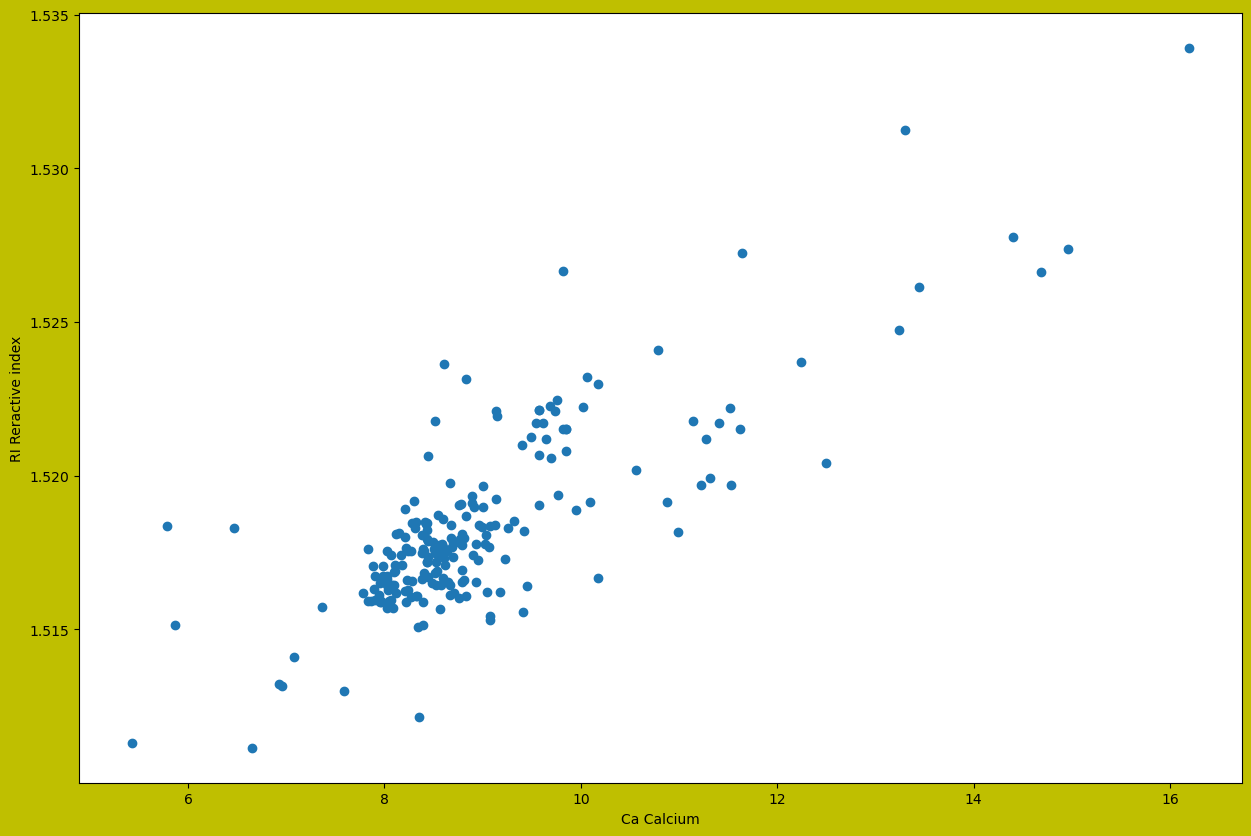

In [36]:
# we can see that  Ca calsium and Ri Reractive index corelated lets check with scatterplot
plt.figure(figsize=(15,10),facecolor='y')
plt.scatter(data['Ca Calcium'],data['RI Reractive index'])
plt.xlabel('Ca Calcium')
plt.ylabel('RI Reractive index')
plt.show()

In [ ]:
# we can see that strong relation is there between Ca calcium and RI reractive index

In [37]:
x=data.drop('Types of Glass',axis=1)
y=data['Types of Glass']

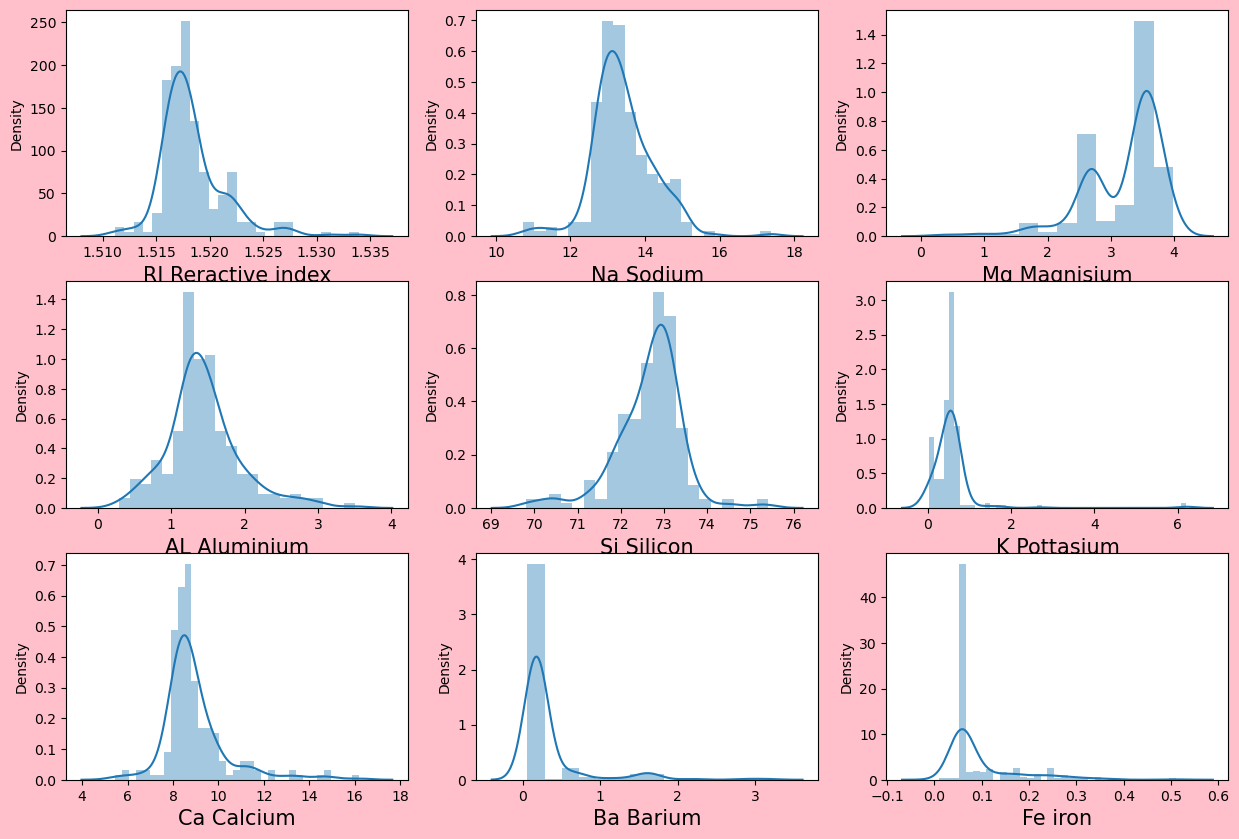

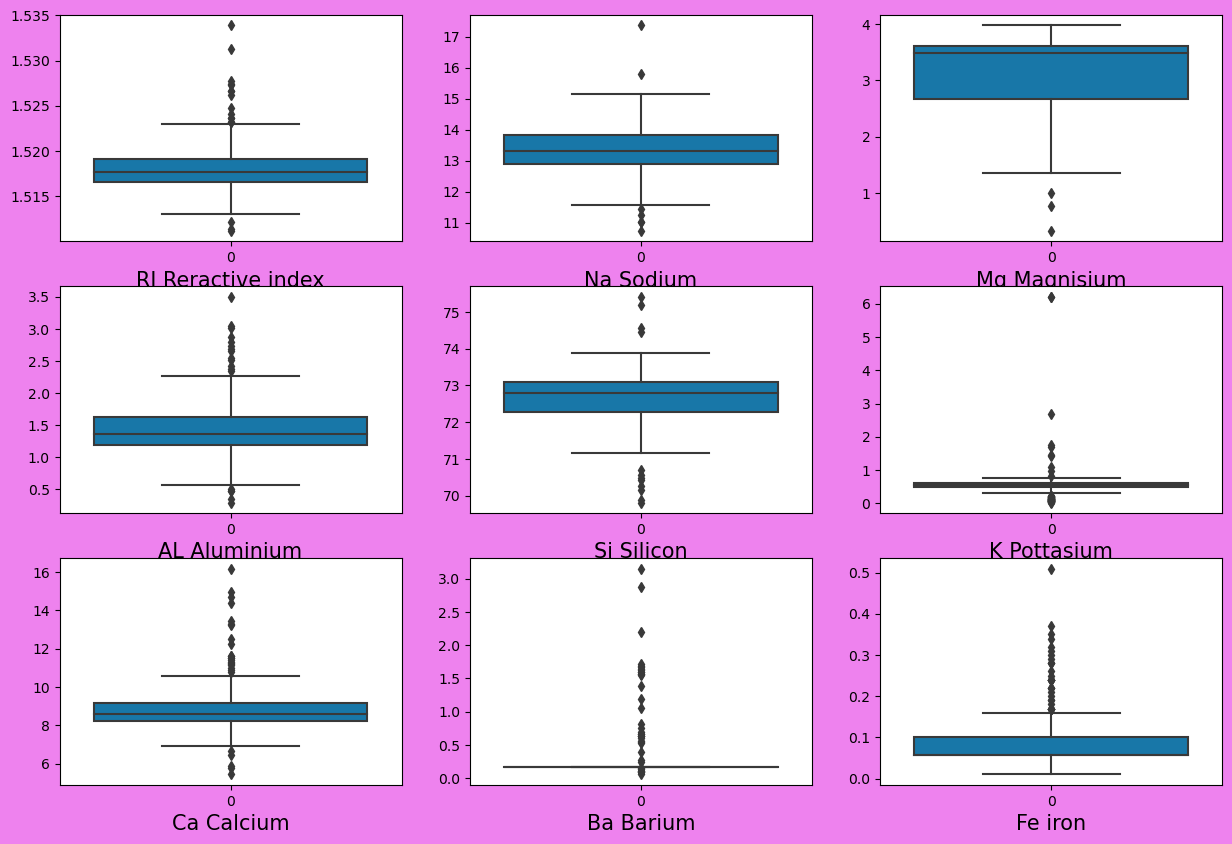

RI Reractive index    1.639658
Na Sodium             0.457318
Mg Magnisium         -1.593298
AL Aluminium          0.900017
Si Silicon           -0.744546
K Pottasium           7.328321
Ca Calcium            2.040591
Ba Barium             3.692318
Fe iron               2.284710
Types of Glass       -1.229860
dtype: float64

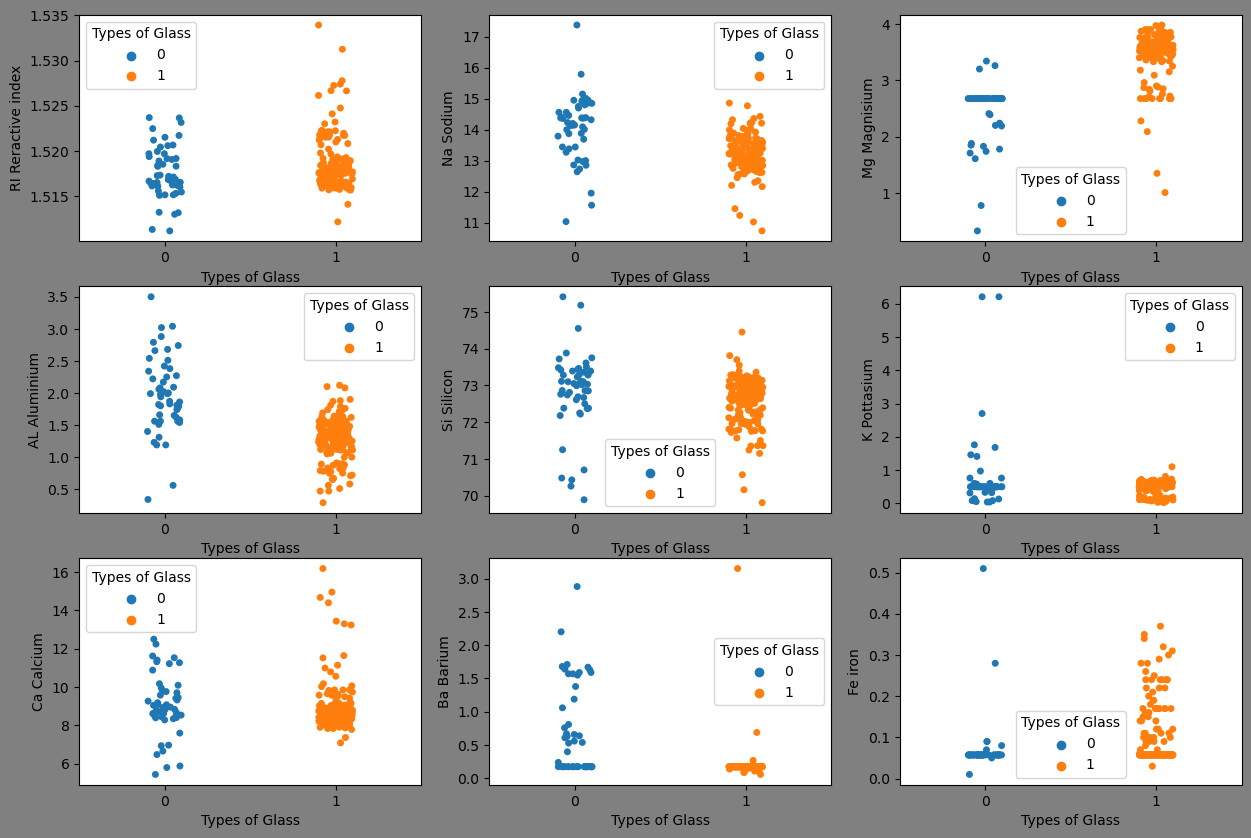

In [38]:
# visualise features and target
plt.figure(figsize=(15,10),facecolor='grey')
p=1
for  columns in x:
    if p<=12:
        plt.subplot(3,3,p)
        sns.stripplot(x=y,y=x[columns],hue=y)
        p+=1
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [41]:
#lets use vif to find multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [42]:
vif

,vif values,features
0,9.172504,RI Reractive index
1,1.789511,Na Sodium
2,2.352938,Mg Magnisium
3,2.702531,AL Aluminium
4,2.969699,Si Silicon
5,1.704403,K Pottasium
6,6.070206,Ca Calcium
7,1.755148,Ba Barium
8,1.125557,Fe iron


In [ ]:
# vif score not high for all features so no multiconinearity problem

In [43]:
y.value_counts()

1    162
0     51
Name: Types of Glass, dtype: int64

In [44]:
# clear evidence of class imbalance
# using oversampling
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [45]:
y1.value_counts()

1    162
0    162
Name: Types of Glass, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [47]:
MAXacc=0
MAXrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>MAXacc:
        MAXacc=acc
        MAXrs=i
print('Best Accuracy score is ',MAXacc,'at random state ',MAXrs)
        

Best Accuracy score is  0.9897959183673469 at random state  18


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=MAXrs)

In [50]:
# Decisiontree classifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
DT_pred=DT.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,DT_pred))
print('\nconfusion_matrix:\n',confusion_matrix(y_test,DT_pred))
print('\nClassification report :\n',classification_report(y_test,DT_pred))



Accuracy score  0.9375

confusion_matrix:
 [[11  1]
 [ 3 49]]

Classification report :
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.98      0.94      0.96        52

    accuracy                           0.94        64
   macro avg       0.88      0.93      0.90        64
weighted avg       0.94      0.94      0.94        64



In [52]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
RFC=DecisionTreeClassifier()
RFC.fit(x_train,y_train)
RFC_pred=RFC.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,RFC_pred))
print('\nconfusion_matrix:\n',confusion_matrix(y_test,RFC_pred))
print('\nClassification report :\n',classification_report(y_test,RFC_pred))

Accuracy score  0.96875

confusion_matrix:
 [[12  0]
 [ 2 50]]

Classification report :
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.96      0.98        52

    accuracy                           0.97        64
   macro avg       0.93      0.98      0.95        64
weighted avg       0.97      0.97      0.97        64



In [53]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,LR_pred))
print('\nconfusion_matrix:\n',confusion_matrix(y_test,LR_pred))
print('\nClassification report :\n',classification_report(y_test,LR_pred))

Accuracy score  0.953125

confusion_matrix:
 [[10  2]
 [ 1 51]]

Classification report :
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.96      0.98      0.97        52

    accuracy                           0.95        64
   macro avg       0.94      0.91      0.92        64
weighted avg       0.95      0.95      0.95        64



In [54]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
GBC_pred=GBC.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,GBC_pred))
print('\nconfusion_matrix:\n',confusion_matrix(y_test,GBC_pred))
print('\nClassification report :\n',classification_report(y_test,GBC_pred))

Accuracy score  0.96875

confusion_matrix:
 [[11  1]
 [ 1 51]]

Classification report :
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.98      0.98      0.98        52

    accuracy                           0.97        64
   macro avg       0.95      0.95      0.95        64
weighted avg       0.97      0.97      0.97        64



In [55]:
# AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
ABC_pred=ABC.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,ABC_pred))
print('\nconfusion_matrix:\n',confusion_matrix(y_test,ABC_pred))
print('\nClassification report :\n',classification_report(y_test,ABC_pred))

Accuracy score  0.984375

confusion_matrix:
 [[11  1]
 [ 0 52]]

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.98      1.00      0.99        52

    accuracy                           0.98        64
   macro avg       0.99      0.96      0.97        64
weighted avg       0.98      0.98      0.98        64



In [56]:
# BaggingClassifier
BAGG=BaggingClassifier()
BAGG.fit(x_train,y_train)
BAGG_pred=BAGG.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,BAGG_pred))
print('\nconfusion_matrix:\n',confusion_matrix(y_test,BAGG_pred))
print('\nClassification report :\n',classification_report(y_test,BAGG_pred))

Accuracy score  0.953125

confusion_matrix:
 [[11  1]
 [ 2 50]]

Classification report :
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.98      0.96      0.97        52

    accuracy                           0.95        64
   macro avg       0.91      0.94      0.93        64
weighted avg       0.96      0.95      0.95        64



In [57]:
# eXTRAtREESClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
ETC_pred=GBC.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,ETC_pred))
print('\nconfusion_matrix:\n',confusion_matrix(y_test,ETC_pred))
print('\nClassification report :\n',classification_report(y_test,ETC_pred))

Accuracy score  0.96875

confusion_matrix:
 [[11  1]
 [ 1 51]]

Classification report :
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.98      0.98      0.98        52

    accuracy                           0.97        64
   macro avg       0.95      0.95      0.95        64
weighted avg       0.97      0.97      0.97        64



In [59]:
# SVC
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(x_train,y_train)
SVM_pred=SVM.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,SVM_pred))
print('\nconfusion_matrix:\n',confusion_matrix(y_test,SVM_pred))
print('\nClassification report :\n',classification_report(y_test,SVM_pred))

Accuracy score  0.953125

confusion_matrix:
 [[11  1]
 [ 2 50]]

Classification report :
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.98      0.96      0.97        52

    accuracy                           0.95        64
   macro avg       0.91      0.94      0.93        64
weighted avg       0.96      0.95      0.95        64



In [68]:
# cross validation score with DecisionTree
from sklearn.model_selection import cross_val_score
score=cross_val_score(DT,x1,y1,cv=5,scoring='accuracy')
print('Accuracy score ',accuracy_score(y_test,DT_pred))
print(score)
print(score.mean())
print('Deference between accuracy score and cross validation score :',accuracy_score(y_test,DT_pred)-score.mean())

Accuracy score  0.9375
[0.93846154 0.96923077 0.93846154 0.87692308 1.        ]
0.9446153846153844
Deference between accuracy score and cross validation score : -0.0071153846153844125


In [61]:
# cross validation score with RandomForest
score1=cross_val_score(RFC,x1,y1)
print('Accuracy score ',accuracy_score(y_test,RFC_pred))
print(score1)
print(score1.mean())
print('Deference between accuracy score and cross validation score :',accuracy_score(y_test,RFC_pred)-score1.mean())

Accuracy score  0.96875
[0.92307692 0.92307692 0.92307692 0.87692308 1.        ]
0.9292307692307691
Deference between accuracy score and cross validation score : 0.03951923076923092


In [62]:
# cross validation score with logistic regression
score2=cross_val_score(LR,x1,y1)
print('Accuracy score ',accuracy_score(y_test,LR_pred))
print(score2)
print(score2.mean())
print('Deference between accuracy score and cross validation score :',accuracy_score(y_test,LR_pred)-score2.mean())

Accuracy score  0.953125
[0.96923077 1.         0.96923077 0.84615385 1.        ]
0.9569230769230771
Deference between accuracy score and cross validation score : -0.0037980769230770983


In [63]:
# cross validation score with GradienBoosting 
score3=cross_val_score(GBC,x1,y1)
print('Accuracy score ',accuracy_score(y_test,GBC_pred))
print(score3)
print(score3.mean())
print('Deference between accuracy score and cross validation score :',accuracy_score(y_test,GBC_pred)-score3.mean())

Accuracy score  0.96875
[0.93846154 0.98461538 0.98461538 0.89230769 1.        ]
0.9600000000000002
Deference between accuracy score and cross validation score : 0.008749999999999813


In [64]:
# cross validation score with AdaBoost
score4=cross_val_score(ABC,x1,y1)
print('Accuracy score ',accuracy_score(y_test,ABC_pred))
print(score4)
print(score4.mean())
print('Deference between accuracy score and cross validation score :',accuracy_score(y_test,ABC_pred)-score4.mean())

Accuracy score  0.984375
[0.92307692 0.98461538 0.92307692 0.84615385 1.        ]
0.9353846153846155
Deference between accuracy score and cross validation score : 0.04899038461538452


In [65]:
# cross validation score with Bagging
score5=cross_val_score(BAGG,x1,y1)
print('Accuracy score ',accuracy_score(y_test,BAGG_pred))
print(score5)
print(score5.mean())
print('Deference between accuracy score and cross validation score :',accuracy_score(y_test,BAGG_pred)-score5.mean())

Accuracy score  0.953125
[0.96923077 0.96923077 0.95384615 0.81538462 1.        ]
0.9415384615384615
Deference between accuracy score and cross validation score : 0.011586538461538454


In [69]:
# cross validation score with extra trees 
score6=cross_val_score(ETC,x1,y1)
print('Accuracy score ',accuracy_score(y_test,ETC_pred))
print(score6)
print(score6.mean())
print('Deference between accuracy score and cross validation score :',accuracy_score(y_test,ETC_pred)-score6.mean())

Accuracy score  0.96875
[0.96923077 1.         0.96923077 0.83076923 1.        ]
0.953846153846154
Deference between accuracy score and cross validation score : 0.01490384615384599


In [ ]:
# deference of accuracy and cross validation score we can see that Decision TreeClassifier model perform well 

In [75]:
# hyper parameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_param=({'criterion':['gini','entropy'],'max_depth':range(10,15),'min_samples_leaf':range(2,6),'min_samples_split':range(3,8),'max_leaf_nodes':range(5,15)})

In [76]:
grid_search=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=grid_param,cv=5,n_jobs=-1)

In [77]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 15),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [78]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 5, 'min_samples_leaf': 4, 'min_samples_split': 6}


In [79]:
dt=DecisionTreeClassifier(criterion='gini',min_samples_split=6,min_samples_leaf=4)

In [80]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=6)

In [81]:
pred=dt.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,pred))
print('Confusion matrix ',confusion_matrix(y_test,pred))
print('Confusion matrix ',classification_report(y_test,pred))

Accuracy score  0.953125
Confusion matrix  [[11  1]
 [ 2 50]]
Confusion matrix                precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.98      0.96      0.97        52

    accuracy                           0.95        64
   macro avg       0.91      0.94      0.93        64
weighted avg       0.96      0.95      0.95        64



In [ ]:
# before hyperparameter tuning accuracy score was 93.75 after hyperparameter tuning accuracy score is 95.31